# **Projet Big Data et Cloud Computing**

---
# Utilisation des Pipelines pour l'Analyse et la prévision Météorologique en zone CEDEAO
---

<div style="text-align: center;">
    <img src="https://media-exp1.licdn.com/dms/image/C4D0BAQHrgk0foyuJvw/company-logo_200_200/0/1559125976448?e=2159024400&v=beta&t=NtJQpfX1B73q4yoE8sy2dBTXfaGAPdmtVeu3JVe2Nf8" alt="Image description" />
</div>


---
 ###                                   Sous la supervision de:  
 ###                                   Mously DIAW,  
 ###                                   Data Scientist / ML Engineer  
###                                    Auto-entrepreneur  
---

>Rédigé par: 

> ADAM ALASSANE Ibrahim  
AWOUTO KOFFI Samson  
ATCHOU ANNA AMAVIE  
HAROUNA GOUMBANE  



# **TABLES DES MATIERES**

## 1.  **[INTRODUCTION](#INTRODUCTION)**
## 2.  **[EXTRACTIONS](#EXTRACTIONS)**
### 2.1 **[Chargement des fichiers depuis kaggle](#Chargement-des-fichiers-depuis-kaggle)**
## 3.  **[TRAITEMENTS](#3.TRAITEMENT-DES-DONNEES)**
## 4.  **[ANALYSE](#ANALYSE)** 
## 5.  **[PREVISION](#PREVISION)**
## 6.  **[CONCLUSION](#CONCLUSION )**
## 7.  **[RESSOURCES](#RESSOURCES)**

In [1]:
from IPython.display import HTML

# Code HTML et CSS pour styliser un texte
html_code = """
<style>
    .styled-text {
        font-family: Verdana;
        font-size: 12px; /* Taille du texte normal */
        color: #333; /* Couleur du texte */
    }
    .styled-title {
        color: #13E6A3; 
        font-weight: "bold"; 
        font-size: 16px; 
    }
    .styled-subtitle {
        color: #150EEB; 
        font-weight: bold; 
        font-size: 14px; 
    }
    .styled-sub-subtitle {
        color: #0E66EB; 
        font-weight: bold; 
        font-size: px; 
    }
    .styled-text {
        font-family: Verdana;
        font-size: 12px; /* Taille du texte normal */
        color: #333; /* Couleur du texte */
</style>


"""

# Afficher le code HTML dans le notebook
display(HTML(html_code))


<h1 class="styled-title">1. INTRODUCTION</h1>


<p class="styled-text">
Le climat est depuis longtemps une préoccupation mondiale, en particulier à cause des effets amplifiés du réchauffement climatique, comme l'a montré l'ouragan récent en Floride, ayant causé 16 morts selon les premiers bilans. Il est clair que, sans les données satellitaires qui ont permis d'identifier la source de l'ouragan et les analyses qui ont suivi pour déterminer sa trajectoire et son ampleur, le nombre de victimes aurait pu être bien plus élevé. Ainsi, une anticipation insuffisante de ces catastrophes pourrait entraîner des conséquences dramatiques, tant humaines que matérielles.

La lutte contre le réchauffement climatique passe par des investissements dans des technologies de surveillance et d'analyse des données climatiques, essentielles pour améliorer la prise de décision. Les données climatiques présentent toutes les caractéristiques de la Big Data : elles sont massives, variées (images satellites, mesures de température, précipitations), arrivent en continu, et sont très fiables, car exemptes de biais de collecte humaine. Par exemple, en une journée, des centaines de milliers de données de divers types (images des nuages, images de l'océan, avancée du désert, données captées par des capteurs) peuvent être recueillies sur une seule zone géographique, ce qui représente un défi imposant.

Cependant, malgré les défis liés à la collecte et à l'analyse de ces données massives, la science doit apporter des solutions, ce qui est désormais possible grâce aux solutions offertes par le cloud, avec des serveurs ayant des capacités de stockage presque illimitées et des machines puissantes permettant le traitement de ces données.

Consciente des enjeux climatiques, la Communauté Économique des États de l'Afrique de l'Ouest (CEDEAO) a mis sur pied une commission chargée de l'élaboration de la Stratégie Régionale Climat (SRC). Il s'agit d'une initiative cruciale pour la région de l'Afrique de l'Ouest, particulièrement vulnérable aux effets du changement climatique. La région connaît des augmentations significatives de température, une variabilité accrue des précipitations et une fréquence plus élevée d'événements météorologiques extrêmes tels que sécheresses et inondations. Ces changements ont des répercussions directes sur l'agriculture, les ressources en eau, la santé publique et les infrastructures.
</p>

<div style="text-align: center;">
    <figure>
        <img src="https://images.theconversation.com/files/406497/original/file-20210615-19-xv665h.gif?ixlib=rb-1.1.0&q=30&auto=format&w=600&h=511&fit=crop&dpr=2" 
             alt="Image description" 
             width="300" height="300" />
        <figcaption style="font-style: italic; color: gray;">Les pays membres de la CEDEAO</figcaption>
    </figure>
</div>

<p class="styled-text">
Dans le cadre de ce projet, intitulé **Utilisation des Pipelines pour l'Analyse et la Prévision Météorologique en zone CEDEAO**, un processus de collecte, de traitement et de visualisation des données climatiques en temps réel a été mis en place pour éclairer les décisions publiques face aux impacts du changement climatique. Ce projet vise à fournir une visualisation dynamique, sur une carte, des régions les plus touchées par divers événements climatiques, notamment les zones les plus chaudes, les plus inondées et les plus venteuses. Pour atteindre cet objectif, il est essentiel de collecter des données provenant de sources fiables, puis de les traiter en temps réel. Parallèlement, l'hébergement de ces données dans le cloud est crucial pour garantir leur accessibilité et leur sécurité. Ce système intégrant la collecte, le traitement et l'hébergement des données, appelé processus de construction d'un pipeline ETL, facilitera une visualisation en temps réel des données climatiques, améliorant ainsi la réactivité et l’efficacité des politiques publiques dans la région.
</p>

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h1 class="styled-title">2. EXTRACTIONS</h1>


<p class = "styled-text">Cette partie est scindée en deux étapes. La première étape consiste à aller chercher les données sur kaggle. Et lors la deuxième étape, nous extrayerons les données de la CEDEAO car notre étude portera sur cette organisation régionale.</p>

<h2 class ="styled-subtitle">2.1 Chargement des fichiers depuis kaggle</h2>


<p class = "styled-text">Pour accéder aux données, il est important d'avoir un compte kaggle et de disposer de sa clé. Vous devez aussi avoir kaggle installer sur la machine. Sinon, exécuter install kaggle.</p>

In [3]:
# Chargement des modules 
import os
import json
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Informations d'authentification pour Kaggle
api_token = {
    "username": "ibrahimadamalassane",
    "key": "ab6fd3829d50bf85ce4071e7bbc8f4e9"
}

# Sauvegarder le fichier kaggle.json dans le répertoire de travail courant
with open('kaggle.json', 'w') as file:
    json.dump(api_token, file)

# Définir le répertoire de configuration de Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

# Assurez-vous que les permissions sont correctes
os.chmod('kaggle.json', 0o600)

# Utiliser la bibliothèque Kaggle pour télécharger un fichier
# Exemple : Remplacez 'dataset-owner/dataset-name' par l'identifiant du dataset que vous souhaitez télécharger
!kaggle datasets download -d guillemservera/global-daily-climate-data
# Extraction des fiichiers Zipper
with zipfile.ZipFile('global-daily-climate-data.zip', 'r') as zip_ref:
    zip_ref.extractall('global-daily-climate-data')
files = os.listdir('global-daily-climate-data')
print(files)

Dataset URL: https://www.kaggle.com/datasets/guillemservera/global-daily-climate-data
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
global-daily-climate-data.zip: Skipping, found more recently modified local copy (use --force to force download)
['cities.csv', 'countries.csv', 'daily_weather.parquet']


<p class = "class = "styled-text"">Voilà qui est fait! Les données se trouvent enfin sur la machine.   
Il suffit de les importer.</p>

In [5]:
# Chemin vers votre fichier Parquet
chemin_parquet = "global-daily-climate-data/daily_weather.parquet"

# Lire le fichier Parquet avec Pandas
df = pd.read_parquet(chemin_parquet, engine='pyarrow')

# Afficher les premières lignes du DataFrame
print(df.head())

# Afficher les schémas des colonnes
#print(df.info())


  station_id city_name       date  season  avg_temp_c  min_temp_c  max_temp_c  \
0      41515  Asadabad 1957-07-01  Summer        27.0        21.1        35.6   
1      41515  Asadabad 1957-07-02  Summer        22.8        18.9        32.2   
2      41515  Asadabad 1957-07-03  Summer        24.3        16.7        35.6   
3      41515  Asadabad 1957-07-04  Summer        26.6        16.1        37.8   
4      41515  Asadabad 1957-07-05  Summer        30.8        20.0        41.7   

   precipitation_mm  snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  \
0               0.0            NaN               NaN                 NaN   
1               0.0            NaN               NaN                 NaN   
2               1.0            NaN               NaN                 NaN   
3               4.1            NaN               NaN                 NaN   
4               0.0            NaN               NaN                 NaN   

   peak_wind_gust_kmh  avg_sea_level_pres_hpa  sunshine_

In [7]:
chemin_cities = "global-daily-climate-data/cities.csv"

df_cities = pd.read_csv(chemin_cities)

print(df_cities.head())

print(df_cities.info())


  station_id   city_name      country       state iso2 iso3   latitude  \
0      41515    Asadabad  Afghanistan       Kunar   AF  AFG  34.866000   
1      38954    Fayzabad  Afghanistan  Badakhshan   AF  AFG  37.129761   
2      41560   Jalalabad  Afghanistan   Nangarhar   AF  AFG  34.441527   
3      38947      Kunduz  Afghanistan      Kunduz   AF  AFG  36.727951   
4      38987  Qala i Naw  Afghanistan     Badghis   AF  AFG  34.983000   

   longitude  
0  71.150005  
1  70.579247  
2  70.436103  
3  68.872530  
4  63.133300  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  1245 non-null   object 
 1   city_name   1244 non-null   object 
 2   country     1245 non-null   object 
 3   state       1217 non-null   object 
 4   iso2        1239 non-null   object 
 5   iso3        1245 non-null   object 
 6   latitude    1245 non-null 

In [42]:
chemin_countries = "global-daily-climate-data/countries.csv"

df_countries = pd.read_csv(chemin_countries)

#print(df_countries.head())

#print(df_countries.info())

<h2 class = "styled-subtitle">2.2 Description des données</h2>

<h3 class = "styles sub-subtitle">2.2.1 Les variables de la base principale</h3>

Dans cette base, il y a 15 variables dont on peut décrire de la façon suivante: 
* station_id: c'est l'identifiant de la station. Elle est de type string (nullable = true)
* city_name: string (nullable = true)
* date: timestamp_ntz (nullable = true)
* season: string (nullable = true)
* avg_temp_c: double (nullable = true)
* min_temp_c: double (nullable = true)
* max_temp_c: double (nullable = true)
* precipitation_mm: double (nullable = true)
* snow_depth_mm: double (nullable = true)
* avg_wind_dir_deg: double (nullable = true)
* avg_wind_speed_kmh: double (nullable = true)
* peak_wind_gust_kmh: double (nullable = true)
* avg_sea_level_pres_hpa: double (nullable = true)
* sunshine_total_min: double (nullable = true)
* index_level_0__: long (nullable = true)

<h3 class = "styled sub-subtitle">2.2.2 Les variables de la base countries</h3>


* country: string (nullable = true)
* native_name: string (nullable = true)
* iso2: string (nullable = true)
* iso3: string (nullable = true)
* population: double (nullable = true)
* area: double (nullable = true)
* capital: string (nullable = true)
* capital_lat: double (nullable = true)
*  capital_lng: double (nullable = true)
* region: string (nullable = true)
* continent: string (nullable = true)

### 2.2.3 Les variables de la base countries

* station_id: string (nullable = true)
* city_name: string (nullable = true)
* country: string (nullable = true)
* state: string (nullable = true)
* iso2: string (nullable = true)
* iso3: string (nullable = true)
* latitude: double (nullable = true)
* longitude: double (nullable = true)


<h1 class = "styled-title>3. TRAITEMENT DES DONNÉES</h1>

<h2 class = "styled-subtitle">3. 1 Extraction des données de la CEDEAO</h2>

A travers ce code, nous allons chercher les pays de la CEDEAO dans la base qui contient les pays. Et nous mettrons dans **df_afrique_ouest**.

In [8]:
pays_afrique_ouest = [
    "Benin", "Burkina Faso", "Cape Verde", "Ivory Coast", 
    "The Gambia", "Ghana", "Guinea", "Guinea Bissau", 
    "Liberia", "Mali", "Niger", "Nigeria", 
    "Senegal", "Sierra Leone", "Togo"
]

# Filtrer le DataFrame pour obtenir uniquement les pays d'Afrique de l'Ouest
df_afrique_ouest = df_cities[df_cities['country'].isin(pays_afrique_ouest)]

print(df_afrique_ouest.head())


    station_id       city_name       country    state iso2 iso3   latitude  \
106      65338          Abomey         Benin      Zou   BJ  BEN   7.190400   
107      65344         Cotonou         Benin    Ouémé   BJ  BEN   6.400009   
108      65319      Natitingou         Benin  Atakora   BJ  BEN  10.320415   
109      65330         Parakou         Benin   Borgou   BJ  BEN   9.340010   
140      65510  Bobo Dioulasso  Burkina Faso    Houet   BF  BFA  11.179975   

     longitude  
106   1.989997  
107   2.519991  
108   1.389982  
109   2.620036  
140  -4.289981  


**Fusions des deux bases**

In [9]:
#Affichons les variables des base pays_afrique_ouest et la base principale
print(df.columns)
print(df_afrique_ouest.columns)

Index(['station_id', 'city_name', 'date', 'season', 'avg_temp_c', 'min_temp_c',
       'max_temp_c', 'precipitation_mm', 'snow_depth_mm', 'avg_wind_dir_deg',
       'avg_wind_speed_kmh', 'peak_wind_gust_kmh', 'avg_sea_level_pres_hpa',
       'sunshine_total_min'],
      dtype='object')
Index(['station_id', 'city_name', 'country', 'state', 'iso2', 'iso3',
       'latitude', 'longitude'],
      dtype='object')


Nous pouvons remarquer qu'on peut faire la jointure via les variables station_idet city_name.  Seules les lignes qui ont des valeurs correspondantes dans les deux DataFrames seront conservées dans **pays_CEDEAO**. Après quoi, nous supprimerons les doublons. Le *iner* indique que l'on souhaite réaliser une jointure interne.

In [10]:
# Fusion sur 'station_id' et 'city_name'
pays_CEDEAO = pd.merge(
    df_afrique_ouest,
    df,
    on=['station_id', 'city_name'],
    how='inner'
)

# Suppression des doublons après la jointure
# Conserver uniquement les colonnes non dupliquées
pays_CEDEAO = pays_CEDEAO.loc[:, ~pays_CEDEAO.columns.duplicated()]

# Afficher le DataFrame fusionné
#print("DataFrame fusionné :")
#print(pays_CEDEAO.head())


**Renomage des variables** 

In [11]:
# Dictionnaire de correspondance pour renommer les colonnes en français
noms_colonnes_francais = {
    'station_id': 'id_station',
    'city_name': 'nom_ville',
    'date': 'date',
    'season': 'saison',
    'avg_temp_c': 'temp_moyenne_c',
    'min_temp_c': 'temp_min_c',
    'max_temp_c': 'temp_max_c',
    'precipitation_mm': 'precipitation_mm',
    'snow_depth_mm': 'profondeur_neige_mm',
    'avg_wind_dir_deg': 'direction_vent_moyenne_deg',
    'avg_wind_speed_kmh': 'vitesse_vent_moyenne_kmh',
    'peak_wind_gust_kmh': 'rafale_vent_max_kmh',
    'avg_sea_level_pres_hpa': 'pression_niveau_mer_hpa',
    'sunshine_total_min': 'ensoleillement_total_min',
    '__index_level_0__': 'index',
    'country': 'pays',
    'state': 'etat',
    'iso2': 'iso2',
    'iso3': 'iso3',
    'latitude': 'latitude',
    'longitude': 'longitude'
}

# Renommer les colonnes
pays_CEDEAO = pays_CEDEAO.rename(columns=noms_colonnes_francais)

# Afficher les noms des nouvelles colonnes
print("Noms des colonnes après renommage :")
print(pays_CEDEAO.columns)


Noms des colonnes après renommage :
Index(['id_station', 'nom_ville', 'pays', 'etat', 'iso2', 'iso3', 'latitude',
       'longitude', 'date', 'saison', 'temp_moyenne_c', 'temp_min_c',
       'temp_max_c', 'precipitation_mm', 'profondeur_neige_mm',
       'direction_vent_moyenne_deg', 'vitesse_vent_moyenne_kmh',
       'rafale_vent_max_kmh', 'pression_niveau_mer_hpa',
       'ensoleillement_total_min'],
      dtype='object')


<h3 class = "styled-sub-subtitle">Pourcentage de valeurs manquantes dans la base pays_CEDEAO</h3>

<h1 class = "styled-title">3.TRAITEMENT DES DONNEES</h1>

<h2 class = "styled-subtitle">3.1 Traitement des variables température moyenne, température maximale et température minimale</h2>

<h3 class = "styled-sub-subtitle">Vérifions les doublons</h3>

Avant toute chose, il est important de savoir si on a des doublons ou pas.

In [12]:
# Compter le nombre total de lignes
total_count = len(pays_CEDEAO)

# Compter le nombre de lignes sans doublons
distinct_count = len(pays_CEDEAO.drop_duplicates())

# Vérifier s'il y a des doublons
if total_count > distinct_count:
    print("Il y a des doublons dans la base.")
else:
    print("Il n'y a pas de doublons dans la base.")


Il n'y a pas de doublons dans la base.


**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h3 class = "styled-sub-subtitle">Vérifions la présence de valeurs manquantes</h3>

Puis, chercher à savoir s'il ya des valeurs manquantes. 

In [13]:
# Vérifier les valeurs manquantes dans chaque colonne
valeurs_manquantes = pays_CEDEAO.isnull().sum()

# Afficher le nombre de valeurs manquantes par colonne
for colonne, valeurs in valeurs_manquantes.items():
    print(f"{colonne}: {valeurs} valeurs manquantes")


id_station: 0 valeurs manquantes
nom_ville: 0 valeurs manquantes
pays: 0 valeurs manquantes
etat: 6463 valeurs manquantes
iso2: 0 valeurs manquantes
iso3: 0 valeurs manquantes
latitude: 0 valeurs manquantes
longitude: 0 valeurs manquantes
date: 0 valeurs manquantes
saison: 0 valeurs manquantes
temp_moyenne_c: 188017 valeurs manquantes
temp_min_c: 227524 valeurs manquantes
temp_max_c: 170517 valeurs manquantes
precipitation_mm: 599391 valeurs manquantes
profondeur_neige_mm: 1185080 valeurs manquantes
direction_vent_moyenne_deg: 1073609 valeurs manquantes
vitesse_vent_moyenne_kmh: 1051776 valeurs manquantes
rafale_vent_max_kmh: 1185080 valeurs manquantes
pression_niveau_mer_hpa: 1076835 valeurs manquantes
ensoleillement_total_min: 1185080 valeurs manquantes


<p class ="styled-text">Il s'est avéré qu'il y a beaucoup de valeurs manquantes. Nous allons devoir les gérer.</p>

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h3 class = "styled-sub-subtitle">Suppression de certaines variables</h3>

<p class ="styled-text">Le champ de notre étude ne couvre pas l'ensoleillemnt et le vent. Il est donc unitile de les garder dans la base.</p>

In [14]:
# Supprimer les colonnes spécifiques
pays_CEDEAO = pays_CEDEAO.drop(columns=['ensoleillement_total_min', 'rafale_vent_max_kmh', 'profondeur_neige_mm', 'pression_niveau_mer_hpa', 'direction_vent_moyenne_deg'])

# Vérifier que les colonnes ont bien été supprimées
print(pays_CEDEAO.columns)


Index(['id_station', 'nom_ville', 'pays', 'etat', 'iso2', 'iso3', 'latitude',
       'longitude', 'date', 'saison', 'temp_moyenne_c', 'temp_min_c',
       'temp_max_c', 'precipitation_mm', 'vitesse_vent_moyenne_kmh'],
      dtype='object')


**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h3 class = "styled-sub-subtitle">Vérifions la présence de valeurs aberrantes</h3>

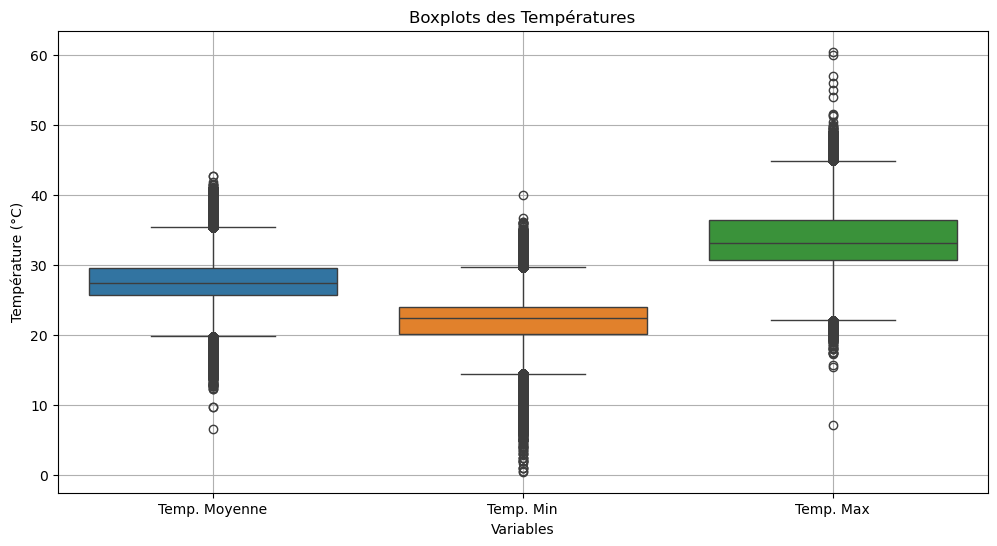

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assurez-vous que le DataFrame pays_CEDEAO est déjà chargé et prêt à être utilisé

# Affichage des boxplots pour temp_moyenne_c, temp_min_c et temp_max_c
plt.figure(figsize=(12, 6))
sns.boxplot(data=pays_CEDEAO[['temp_moyenne_c', 'temp_min_c', 'temp_max_c']])
plt.title('Boxplots des Températures')
plt.ylabel('Température (°C)')
plt.xlabel('Variables')
plt.xticks(ticks=[0, 1, 2], labels=['Temp. Moyenne', 'Temp. Min', 'Temp. Max'])  # Renommage des axes x
plt.grid(True)
plt.show()

<p class = "styled-text">Apparemment il y a des jours où il y a eu plus de 60°C. Est-ce normal?</p>

In [17]:
# Calculer les déciles pour les trois variables
deciles = pays_CEDEAO[['temp_moyenne_c', 'temp_min_c', 'temp_max_c']].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# Renommer les index pour plus de clarté
deciles.index = [f'Décile {int(d * 10)}' for d in deciles.index]

# Afficher les déciles dans un tableau
print("Déciles des variables de température :")
print(deciles)

Déciles des variables de température :
          temp_moyenne_c  temp_min_c  temp_max_c
Décile 1            24.2        17.5        28.5
Décile 2            25.3        19.6        30.0
Décile 3            26.1        20.9        31.2
Décile 4            26.8        21.6        32.2
Décile 5            27.5        22.4        33.2
Décile 6            28.2        23.0        34.4
Décile 7            29.1        23.8        35.6
Décile 8            30.2        24.6        37.2
Décile 9            32.2        26.0        39.4


In [18]:
# Base de données pour les villes où la température maximale dépasse 50 °C
villes_temp_max_50 = pays_CEDEAO[pays_CEDEAO["temp_max_c"] > 50][["nom_ville", "date"]].drop_duplicates()
nb_villes_temp_max_50 = villes_temp_max_50["nom_ville"].nunique()
print(f"Nombre de villes où la température maximale dépasse 50°C : {nb_villes_temp_max_50}")

# Base de données pour les villes où la température minimale est inférieure à 5 °C
villes_temp_min_5 = pays_CEDEAO[pays_CEDEAO["temp_min_c"] < 5][["nom_ville", "date"]].drop_duplicates()
nb_villes_temp_min_5 = villes_temp_min_5["nom_ville"].nunique()
print(f"Nombre de villes où la température minimale est inférieure à 5°C : {nb_villes_temp_min_5}")


Nombre de villes où la température maximale dépasse 50°C : 7
Nombre de villes où la température minimale est inférieure à 5°C : 16


In [19]:
# Détection des valeurs aberrantes basées sur les nouvelles plages réalistes
outliers_realistes = pays_CEDEAO[
    (pays_CEDEAO["temp_moyenne_c"] < 5) | (pays_CEDEAO["temp_moyenne_c"] > 50) |  # Température moyenne
    (pays_CEDEAO["temp_min_c"] < 5) | (pays_CEDEAO["temp_min_c"] > 40) |          # Température minimale
    (pays_CEDEAO["temp_max_c"] < 15) | (pays_CEDEAO["temp_max_c"] > 50)           # Température maximale
]

# Afficher le nombre d'observations avec des valeurs aberrantes
nombre_outliers = len(outliers_realistes)
print(f"Nombre d'observations avec des valeurs aberrantes : {nombre_outliers}")

# Afficher les valeurs aberrantes (décommenter pour voir les valeurs)
# print(outliers_realistes)


Nombre d'observations avec des valeurs aberrantes : 42


<h3 class = "styled-sub-subtitle">Taille de la base</h3>

In [20]:
# Compter le nombre de lignes dans le DataFrame pays_CEDEAO
taille_pays_CEDEAO = len(pays_CEDEAO)

# Afficher la taille
print(f"La taille de la base pays_CEDEAO est : {taille_pays_CEDEAO} lignes.")


La taille de la base pays_CEDEAO est : 1185080 lignes.


<h3 class = "styled-sub-subtitle">Correction des valeurs aberrantes</h3>

<p class = "styled-text">Explication de la méthodologie </p>

In [21]:
import numpy as np

# Liste des colonnes à corriger
colonnes_a_corriger = ['temp_moyenne_c', 'temp_min_c', 'temp_max_c']

# Définir les plages réalistes pour les températures
plages_realistes = {
    'temp_moyenne_c': (5, 50),
    'temp_min_c': (5, 40),
    'temp_max_c': (15, 50)
}

# Créer une colonne 'annee' dans pays_CEDEAO
pays_CEDEAO['annee'] = pd.to_datetime(pays_CEDEAO['date']).dt.year

for colonne in colonnes_a_corriger:
    # Définir les limites inférieures et supérieures de la plage réaliste pour chaque colonne
    limite_inferieure, limite_superieure = plages_realistes[colonne]

    # Calculer la moyenne pour chaque combinaison de pays, id_station, année et saison
    moyennes_df = (
        pays_CEDEAO.groupby(['pays', 'id_station', 'annee', 'saison'])[colonne]
        .mean()
        .reset_index()
        .rename(columns={colonne: f'moyenne_{colonne}'})
    )

    # Vérifier le DataFrame des moyennes
    print(f"Moyennes pour {colonne} :")
    print(moyennes_df.head())  # Afficher les premières lignes pour vérification

    # Effectuer une jointure pour remplacer les valeurs aberrantes
    pays_CEDEAO = pays_CEDEAO.merge(
        moyennes_df,
        on=['pays', 'id_station', 'annee', 'saison'],
        how='left'
    )

    # Vérifier les colonnes après la jointure
    print(f"Colonnes après jointure pour {colonne} :")
    print(pays_CEDEAO.columns)  # Afficher les colonnes

    # Utiliser NumPy pour remplacer les valeurs aberrantes par la moyenne
    condition_aberrante = (pays_CEDEAO[colonne] < limite_inferieure) | (pays_CEDEAO[colonne] > limite_superieure)
    pays_CEDEAO[colonne] = np.where(condition_aberrante, pays_CEDEAO[f'moyenne_{colonne}'], pays_CEDEAO[colonne])

    # Supprimer la colonne de moyenne après utilisation
    pays_CEDEAO.drop(columns=[f'moyenne_{colonne}'], inplace=True)

# Afficher le DataFrame final corrigé
print(pays_CEDEAO)


C:\Users\DELL\AppData\Local\Temp\ipykernel_11824\934519368.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pays_CEDEAO.groupby(['pays', 'id_station', 'annee', 'saison'])[colonne]


Moyennes pour temp_moyenne_c :
    pays id_station  annee  saison  moyenne_temp_moyenne_c
0  Benin      08589   1906  Autumn                     NaN
1  Benin      08589   1906  Spring                     NaN
2  Benin      08589   1906  Summer                     NaN
3  Benin      08589   1906  Winter                     NaN
4  Benin      08589   1907  Autumn                     NaN
Colonnes après jointure pour temp_moyenne_c :
Index(['id_station', 'nom_ville', 'pays', 'etat', 'iso2', 'iso3', 'latitude',
       'longitude', 'date', 'saison', 'temp_moyenne_c', 'temp_min_c',
       'temp_max_c', 'precipitation_mm', 'vitesse_vent_moyenne_kmh', 'annee',
       'moyenne_temp_moyenne_c'],
      dtype='object')


C:\Users\DELL\AppData\Local\Temp\ipykernel_11824\934519368.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pays_CEDEAO.groupby(['pays', 'id_station', 'annee', 'saison'])[colonne]


Moyennes pour temp_min_c :
    pays id_station  annee  saison  moyenne_temp_min_c
0  Benin      08589   1906  Autumn                 NaN
1  Benin      08589   1906  Spring                 NaN
2  Benin      08589   1906  Summer                 NaN
3  Benin      08589   1906  Winter                 NaN
4  Benin      08589   1907  Autumn                 NaN
Colonnes après jointure pour temp_min_c :
Index(['id_station', 'nom_ville', 'pays', 'etat', 'iso2', 'iso3', 'latitude',
       'longitude', 'date', 'saison', 'temp_moyenne_c', 'temp_min_c',
       'temp_max_c', 'precipitation_mm', 'vitesse_vent_moyenne_kmh', 'annee',
       'moyenne_temp_min_c'],
      dtype='object')


C:\Users\DELL\AppData\Local\Temp\ipykernel_11824\934519368.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pays_CEDEAO.groupby(['pays', 'id_station', 'annee', 'saison'])[colonne]


Moyennes pour temp_max_c :
    pays id_station  annee  saison  moyenne_temp_max_c
0  Benin      08589   1906  Autumn                 NaN
1  Benin      08589   1906  Spring                 NaN
2  Benin      08589   1906  Summer                 NaN
3  Benin      08589   1906  Winter                 NaN
4  Benin      08589   1907  Autumn                 NaN
Colonnes après jointure pour temp_max_c :
Index(['id_station', 'nom_ville', 'pays', 'etat', 'iso2', 'iso3', 'latitude',
       'longitude', 'date', 'saison', 'temp_moyenne_c', 'temp_min_c',
       'temp_max_c', 'precipitation_mm', 'vitesse_vent_moyenne_kmh', 'annee',
       'moyenne_temp_max_c'],
      dtype='object')
        id_station nom_ville   pays    etat iso2 iso3  latitude  longitude  \
0            65338    Abomey  Benin     Zou   BJ  BEN  7.190400   1.989997   
1            65338    Abomey  Benin     Zou   BJ  BEN  7.190400   1.989997   
2            65338    Abomey  Benin     Zou   BJ  BEN  7.190400   1.989997   
3          

Ce code a pour objectif de détecter et corriger les valeurs aberrantes dans les colonnes de température d'un DataFrame. Les valeurs aberrantes sont remplacées par la moyenne des températures calculée pour chaque groupe défini par le pays, la station, l'année et la saison. Cela permet d'obtenir des données plus fiables pour une analyse ultérieure.

<h3 class = "styled-sub-subtitle">Vérifions à nouveau la présence de valeurs aberrantes après correction</h3>

<p class = "styled-text">La littérature...</p>

In [23]:
# Détection des valeurs aberrantes basées sur des plages réalistes
outliers_realistes = pays_CEDEAO[
    (pays_CEDEAO["temp_moyenne_c"] < 5) | (pays_CEDEAO["temp_moyenne_c"] > 50) |
    (pays_CEDEAO["temp_min_c"] < 5) | (pays_CEDEAO["temp_min_c"] > 40) |
    (pays_CEDEAO["temp_max_c"] < 15) | (pays_CEDEAO["temp_max_c"] > 50)
]

# Afficher les valeurs aberrantes
print("Valeurs aberrantes basées sur des plages réalistes :")
print(outliers_realistes)

# Compter le nombre d'observations avec des valeurs aberrantes
nombre_outliers = outliers_realistes.shape[0]  # shape = pour obtenir le nombre de lignes

# Afficher le résultat
print(f"Nombre d'observations avec des valeurs aberrantes : {nombre_outliers}")


Valeurs aberrantes basées sur des plages réalistes :
       id_station nom_ville    pays  etat iso2 iso3   latitude  longitude  \
345309      61809      Labé  Guinea  Labe   GN  GIN  11.319992 -12.300009   

             date  saison  temp_moyenne_c  temp_min_c  temp_max_c  \
345309 2001-01-24  Winter            20.1         4.0         NaN   

        precipitation_mm  vitesse_vent_moyenne_kmh  annee  
345309               NaN                       NaN   2001  
Nombre d'observations avec des valeurs aberrantes : 1


<h2 class = "styled-subtitle">Traitement des valeurs manquantes</h2>

<h3 class = "styled-sub-subtitle">Vérifions si les valeurs manquantes sont expliquées par un ou des pays spécifiques</h3>

<p class = "styled-text">En résumé, ce code filtre le DataFrame de données sur les pays de l'Afrique de l'Ouest pour créer des DataFrames spécifiques à chaque pays. Ensuite, il compte les valeurs manquantes pour chaque colonne dans ces DataFrames et stocke ces informations dans un dictionnaire. L'affichage des résultats est prévu, mais actuellement commenté pour ne pas être exécuté.</p>

In [90]:
# Créer un dictionnaire pour stocker les DataFrames par pays
dataframes_par_pays = {}

# Filtrer les données pour chaque pays et les stocker dans le dictionnaire
for pays in pays_afrique_ouest:
    dataframes_par_pays[pays] = pays_CEDEAO[pays_CEDEAO['pays'] == pays]

# Créer un dictionnaire pour stocker le nombre de valeurs manquantes par pays
valeurs_manquantes_par_pays = {}

# Compter les valeurs manquantes pour chaque DataFrame de pays
for pays, df in dataframes_par_pays.items():
    missing_values_count = df.isnull().sum()  # Compter les valeurs manquantes par colonne
    valeurs_manquantes_par_pays[pays] = missing_values_count

# Afficher le nombre de valeurs manquantes pour chaque pays
for pays, count_series in valeurs_manquantes_par_pays.items():
    print(f"Valeurs manquantes pour {pays}:")
    print(count_series)


Valeurs manquantes pour Benin:
id_station                        0
nom_ville                         0
pays                              0
etat                              0
iso2                              0
iso3                              0
latitude                          0
longitude                         0
date                              0
saison                            0
temp_moyenne_c                21872
temp_min_c                    11374
temp_max_c                     7040
precipitation_mm              35227
profondeur_neige_mm           88368
direction_vent_moyenne_deg    88368
vitesse_vent_moyenne_kmh      88368
rafale_vent_max_kmh           88368
pression_niveau_mer_hpa       88368
ensoleillement_total_min      88368
annee                             0
moyenne_temp_min_c_x              0
moyenne_temp_min_c_y              0
dtype: int64
Valeurs manquantes pour Burkina Faso:
id_station                         0
nom_ville                          0
pays            

<h3 class = "styled-sub-subtitle">Vérifions si les valeurs manquantes sont expliquées par un ou des saisons spécifiques</h3>

In [3]:
# Convertir la colonne 'date' en type datetime si ce n'est pas déjà fait
pays_CEDEAO['date'] = pd.to_datetime(pays_CEDEAO['date'])

# Créer un dictionnaire pour stocker le nombre de valeurs manquantes par année
valeurs_manquantes_par_annee = {}

# Extraire les années uniques du DataFrame
annees_uniques = pays_CEDEAO['date'].dt.year.unique()

# Compter les valeurs manquantes pour chaque année
for annee in annees_uniques:
    # Filtrer le DataFrame pour l'année courante
    df_annee = pays_CEDEAO[pays_CEDEAO['date'].dt.year == annee]
    
    # Compter les valeurs manquantes
    missing_values_count = df_annee.isnull().sum()  # Compter les valeurs manquantes par colonne
    
    # Convertir le résultat en dictionnaire
    valeurs_manquantes_par_annee[annee] = missing_values_count.to_dict()

# Afficher le nombre de valeurs manquantes pour chaque année
for annee, count_dict in valeurs_manquantes_par_annee.items():
    print(f"Valeurs manquantes pour l'année {annee}:")
    for colonne, count in count_dict.items():
        print(f"  {colonne}: {count}")


NameError: name 'pd' is not defined

<h3 class = "styled-sub-subtitle">corrections des valeurs manquantes</h3>

In [24]:
# Liste des colonnes à corriger
colonnes_a_corriger = ['temp_moyenne_c', 'temp_min_c', 'temp_max_c']

# Créer une colonne 'annee' dans CEDEAO
pays_CEDEAO['annee'] = pays_CEDEAO['date'].dt.year  # Extraire l'année de la colonne date

for colonne in colonnes_a_corriger:
    # Calculer la moyenne pour chaque combinaison de pays, id_station, année et saison
    moyennes_df = (
        pays_CEDEAO.groupby(['pays', 'id_station', 'annee', 'saison'])
        [colonne].mean().reset_index(name=f'moyenne_{colonne}')
    )

    # Effectuer une jointure pour remplir les valeurs manquantes
    pays_CEDEAO = pays_CEDEAO.merge(
        moyennes_df,
        on=['pays', 'id_station', 'annee', 'saison'],
        how='left'
    )

    # Remplir les valeurs manquantes
    pays_CEDEAO[colonne] = pays_CEDEAO[colonne].fillna(pays_CEDEAO[f'moyenne_{colonne}'])

    # Supprimer la colonne de moyenne après utilisation
    pays_CEDEAO.drop(columns=[f'moyenne_{colonne}'], inplace=True)

# Afficher le DataFrame final
print(pays_CEDEAO.head())  # Affiche les premières lignes du DataFrame


C:\Users\DELL\AppData\Local\Temp\ipykernel_11824\2879658242.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pays_CEDEAO.groupby(['pays', 'id_station', 'annee', 'saison'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_11824\2879658242.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pays_CEDEAO.groupby(['pays', 'id_station', 'annee', 'saison'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_11824\2879658242.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fu

  id_station nom_ville   pays etat iso2 iso3  latitude  longitude       date  \
0      65338    Abomey  Benin  Zou   BJ  BEN    7.1904   1.989997 1973-01-02   
1      65338    Abomey  Benin  Zou   BJ  BEN    7.1904   1.989997 1973-01-03   
2      65338    Abomey  Benin  Zou   BJ  BEN    7.1904   1.989997 1973-01-04   
3      65338    Abomey  Benin  Zou   BJ  BEN    7.1904   1.989997 1973-01-06   
4      65338    Abomey  Benin  Zou   BJ  BEN    7.1904   1.989997 1973-01-07   

   saison  temp_moyenne_c  temp_min_c  temp_max_c  precipitation_mm  \
0  Winter            29.0   24.090909   35.527778               NaN   
1  Winter            30.2   24.090909   35.527778               NaN   
2  Winter            30.4   24.090909   35.527778               NaN   
3  Winter            29.4   26.000000   35.527778               NaN   
4  Winter            29.3   24.000000   35.000000               NaN   

   vitesse_vent_moyenne_kmh  annee  
0                       NaN   1973  
1                 

<h3 class = "styled-sub-subtitle">Vérifions la présence des valeurs manquantes après correction</h3>


In [20]:
# Vérifier les valeurs manquantes dans le DataFrame CEDEAO
valeurs_manquantes_pays_CEDEAO = pays_CEDEAO.isnull().sum()

# Afficher le nombre de valeurs manquantes par colonne
for column, missing in valeurs_manquantes_pays_CEDEAO.items():
    print(f"{column}: {missing} valeurs manquantes")


id_station: 0 valeurs manquantes
nom_ville: 0 valeurs manquantes
pays: 0 valeurs manquantes
etat: 6463 valeurs manquantes
iso2: 0 valeurs manquantes
iso3: 0 valeurs manquantes
latitude: 0 valeurs manquantes
longitude: 0 valeurs manquantes
date: 0 valeurs manquantes
saison: 0 valeurs manquantes
temp_moyenne_c: 178964 valeurs manquantes
temp_min_c: 21715 valeurs manquantes
temp_max_c: 13854 valeurs manquantes
precipitation_mm: 599391 valeurs manquantes
vitesse_vent_moyenne_kmh: 1051776 valeurs manquantes
annee: 0 valeurs manquantes


<h3 class = "styled-sub-subtitle">Seconde phase de correction de valeurs manquantes</h3>

In [25]:
# Liste des colonnes à corriger
colonnes_a_corriger = ['temp_moyenne_c', 'temp_min_c', 'temp_max_c']

# Créer une colonne 'annee' dans CEDEAO
pays_CEDEAO['annee'] = pd.to_datetime(pays_CEDEAO['date']).dt.year  # Assurez-vous que 'date' est de type datetime

for colonne in colonnes_a_corriger:
    # Calculer la moyenne pour chaque combinaison de pays, id_station et saison
    moyennes_df = pays_CEDEAO.groupby(['pays', 'id_station', 'saison'])[colonne].mean().reset_index()
    moyennes_df.rename(columns={colonne: f'moyenne_{colonne}'}, inplace=True)

    # Effectuer une jointure pour remplir les valeurs manquantes
    pays_CEDEAO = pays_CEDEAO.merge(
        moyennes_df,
        on=['pays', 'id_station', 'saison'],
        how='left'
    )

    # Remplir les valeurs manquantes avec les moyennes calculées
    pays_CEDEAO[colonne] = pays_CEDEAO[colonne].fillna(pays_CEDEAO[f'moyenne_{colonne}'])

    # Supprimer la colonne de moyenne après utilisation
    pays_CEDEAO.drop(columns=[f'moyenne_{colonne}'], inplace=True)

# Afficher le DataFrame final
print(pays_CEDEAO)


C:\Users\DELL\AppData\Local\Temp\ipykernel_11824\2256283849.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  moyennes_df = pays_CEDEAO.groupby(['pays', 'id_station', 'saison'])[colonne].mean().reset_index()
C:\Users\DELL\AppData\Local\Temp\ipykernel_11824\2256283849.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  moyennes_df = pays_CEDEAO.groupby(['pays', 'id_station', 'saison'])[colonne].mean().reset_index()
C:\Users\DELL\AppData\Local\Temp\ipykernel_11824\2256283849.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observe

        id_station nom_ville   pays    etat iso2 iso3  latitude  longitude  \
0            65338    Abomey  Benin     Zou   BJ  BEN  7.190400   1.989997   
1            65338    Abomey  Benin     Zou   BJ  BEN  7.190400   1.989997   
2            65338    Abomey  Benin     Zou   BJ  BEN  7.190400   1.989997   
3            65338    Abomey  Benin     Zou   BJ  BEN  7.190400   1.989997   
4            65338    Abomey  Benin     Zou   BJ  BEN  7.190400   1.989997   
...            ...       ...    ...     ...  ...  ...       ...        ...   
1185075      65361    Sokodé   Togo  Centre   TG  TGO  8.990471   1.149997   
1185076      65361    Sokodé   Togo  Centre   TG  TGO  8.990471   1.149997   
1185077      65361    Sokodé   Togo  Centre   TG  TGO  8.990471   1.149997   
1185078      65361    Sokodé   Togo  Centre   TG  TGO  8.990471   1.149997   
1185079      65361    Sokodé   Togo  Centre   TG  TGO  8.990471   1.149997   

              date  saison  temp_moyenne_c  temp_min_c  temp_ma

<h3 class = "styled-sub-subtitle">vérifions à nouveau la présence de valeurs manquante</h3>

In [22]:
# Compter les valeurs manquantes pour chaque colonne
valeurs_manquantes_pays_CEDEAO = pays_CEDEAO.isnull().sum()

# Afficher le nombre de valeurs manquantes par colonne
for column, missing in valeurs_manquantes_pays_CEDEAO.items():
    print(f"{column}: {missing} valeurs manquantes")


id_station: 0 valeurs manquantes
nom_ville: 0 valeurs manquantes
pays: 0 valeurs manquantes
etat: 6463 valeurs manquantes
iso2: 0 valeurs manquantes
iso3: 0 valeurs manquantes
latitude: 0 valeurs manquantes
longitude: 0 valeurs manquantes
date: 0 valeurs manquantes
saison: 0 valeurs manquantes
temp_moyenne_c: 0 valeurs manquantes
temp_min_c: 0 valeurs manquantes
temp_max_c: 0 valeurs manquantes
precipitation_mm: 599391 valeurs manquantes
vitesse_vent_moyenne_kmh: 1051776 valeurs manquantes
annee: 0 valeurs manquantes


<h2 class = "styled-subtitle">2. Traitement de la variable précipitation</h2>

In [26]:
df_cedeao = pays_CEDEAO
val_mq_precipitations = df_cedeao[df_cedeao['precipitation_mm'].isnull()]


<p class = "styled-text">L'objectif est de récupérer les dates pour vérifier notre intuition: il ne pleut
presque pas en janvier dans les pays de la zone CEDEAO.</p>

In [33]:
valeurs_manquantes = pays_CEDEAO.isnull().sum()
valeurs_manquantes

id_station                        0
nom_ville                         0
pays                              0
etat                           6463
iso2                              0
iso3                              0
latitude                          0
longitude                         0
date                              0
saison                            0
temp_moyenne_c                    0
temp_min_c                        0
temp_max_c                        0
precipitation_mm             599391
vitesse_vent_moyenne_kmh    1051776
annee                             0
dtype: int64

In [34]:
# Récupérer les dates où il manque des données
dates_mq = val_mq_precipitations['date'].unique()
print(dates_mq) 
# QU'est-ce que je disais?

<DatetimeArray>
['1973-01-02 00:00:00', '1973-01-03 00:00:00', '1973-01-04 00:00:00',
 '1973-01-06 00:00:00', '1973-01-07 00:00:00', '1973-01-17 00:00:00',
 '1973-01-18 00:00:00', '1973-01-21 00:00:00', '1973-01-22 00:00:00',
 '1973-01-25 00:00:00',
 ...
 '1981-08-31 00:00:00', '1981-10-09 00:00:00', '1972-12-03 00:00:00',
 '1974-03-15 00:00:00', '1977-02-17 00:00:00', '1977-05-18 00:00:00',
 '1978-12-07 00:00:00', '1979-05-02 00:00:00', '1980-04-12 00:00:00',
 '1981-08-19 00:00:00']
Length: 31168, dtype: datetime64[us]


In [35]:
# Création de la colonne mois 
val_mq_precipitations['month'] = val_mq_precipitations['date'].dt.month

C:\Users\DELL\AppData\Local\Temp\ipykernel_11824\511319965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_mq_precipitations['month'] = val_mq_precipitations['date'].dt.month


In [36]:
val_mq_precipitations['month'].unique()
# Il y a du tout

array([ 1,  2,  3,  4,  5,  6,  7,  8, 11, 12, 10,  9])

In [37]:
distribution_frequences = val_mq_precipitations['month'].value_counts()
print(distribution_frequences)


month
1     63620
12    61539
3     59897
2     57376
11    55935
4     54263
5     50619
10    46852
6     40872
7     38570
8     35322
9     34526
Name: count, dtype: int64


In [30]:
# Villes pour les quelles il n'y pas de données sur les précipitations
val_mq_precipitations['nom_ville'].unique() #

array(['Abomey', 'Cotonou', 'Natitingou', 'Parakou', 'Bobo Dioulasso',
       'Dédougou', "Fada N'gourma", 'Gaoua', 'Ouagadougou', 'Ouahigouya',
       'Pô', 'Réo', 'Praia', 'Accra', 'Bolgatanga', 'Ho', 'Koforidua',
       'Kumasi', 'Sekondi-Takoradi', 'Sunyani', 'Tamale', 'Wa', 'Boké',
       'Conakry', 'Faranah', 'Kankan', 'Kindia', 'Labé', 'Mali', 'Mamou',
       'Nzérékoré', 'Bissau', 'Bolama', 'Abidjan', 'Aboisso', 'Bondoukou',
       'Bouaké', 'Daloa', 'Dimbokro', 'Gagnoa', 'Korhogo', 'Man',
       'Odienné', 'San Pédro', 'Yamoussoukro', 'Harper', 'Kakata',
       'Bamako', 'Kayes', 'Mopti', 'San', 'Sikasso', 'Ségou', 'Agadez',
       'Diffa', 'Maradi', 'Niamey', 'Tahoua', 'Zinder', 'Birnin Kebbi',
       'Gashua', 'Ilorin', 'Jos', 'Kano', 'Lagos', 'Maiduguri', 'Makurdi',
       'Minna', 'Port Harcourt', 'Sokoto', 'Yola', 'Dakar', 'Diourbel',
       'Kaolack', 'Kaédi', 'Kolda', 'Louga', 'Tambacounda', 'Ziguinchor',
       'Freetown', 'Brikama', 'Lomé', 'Sokodé'], dtype=object)

In [31]:
val_mq_precipitations.head()

,id_station,nom_ville,pays,etat,iso2,iso3,latitude,longitude,date,saison,temp_moyenne_c,temp_min_c,temp_max_c,precipitation_mm,vitesse_vent_moyenne_kmh,annee,month
0,65338,Abomey,Benin,Zou,BJ,BEN,7.1904,1.989997,1973-01-02,Winter,29.0,24.090909,35.527778,NaN,NaN,1973,1
1,65338,Abomey,Benin,Zou,BJ,BEN,7.1904,1.989997,1973-01-03,Winter,30.2,24.090909,35.527778,NaN,NaN,1973,1
2,65338,Abomey,Benin,Zou,BJ,BEN,7.1904,1.989997,1973-01-04,Winter,30.4,24.090909,35.527778,NaN,NaN,1973,1
3,65338,Abomey,Benin,Zou,BJ,BEN,7.1904,1.989997,1973-01-06,Winter,29.4,26.000000,35.527778,NaN,NaN,1973,1
4,65338,Abomey,Benin,Zou,BJ,BEN,7.1904,1.989997,1973-01-07,Winter,29.3,24.000000,35.000000,NaN,NaN,1973,1


In [33]:
df_cedeao.head()

,id_station,nom_ville,pays,etat,iso2,iso3,latitude,longitude,date,saison,temp_moyenne_c,temp_min_c,temp_max_c,precipitation_mm,vitesse_vent_moyenne_kmh,annee
0,65338,Abomey,Benin,Zou,BJ,BEN,7.1904,1.989997,1973-01-02,Winter,29.0,24.090909,35.527778,NaN,NaN,1973
1,65338,Abomey,Benin,Zou,BJ,BEN,7.1904,1.989997,1973-01-03,Winter,30.2,24.090909,35.527778,NaN,NaN,1973
2,65338,Abomey,Benin,Zou,BJ,BEN,7.1904,1.989997,1973-01-04,Winter,30.4,24.090909,35.527778,NaN,NaN,1973
3,65338,Abomey,Benin,Zou,BJ,BEN,7.1904,1.989997,1973-01-06,Winter,29.4,26.000000,35.527778,NaN,NaN,1973
4,65338,Abomey,Benin,Zou,BJ,BEN,7.1904,1.989997,1973-01-07,Winter,29.3,24.000000,35.000000,NaN,NaN,1973


In [32]:
# Créer le tableau croisé dynamique avec city_name en lignes et month en colonnes
tableau_croise = pd.crosstab(val_mq_precipitations['nom_ville'], val_mq_precipitations['month'])

# Afficher le tableau croisé
print(tableau_croise)


month           1     2     3     4     5     6     7     8     9     10  \
nom_ville                                                                  
Abidjan       1115   937   865   746   578   416   692   812   709   593   
Aboisso        926   744   700   605   440   319   563   598   440   383   
Abomey        1125   990   886   718   702   591   639   639   498   603   
Accra         1002   850   946   836   800   616   793   771   692   685   
Agadez        1381  1237  1383  1317  1356  1141   987   843  1112  1339   
...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Wa             322   296   289   271   264   243   238   223   237   232   
Yamoussoukro   903   762   695   622   579   504   655   579   462   512   
Yola            44    36    37    52    49    49    38    33    19    37   
Ziguinchor    1137  1083  1183  1151  1139   792   427   267   317   660   
Zinder        1820  1645  1798  1755  1692  1428  1219  1105  1451  1874   

month      

In [35]:
fichier_excel = 'tableau_croise_villes_mois.xlsx'
tableau_croise.to_excel(fichier_excel)

<p class = "styledd-text">Le tableau croisé ne nous permet pas de dire avec certitude que les données manquantes ne sont pas dues   
à l'absence de pluies. Il y a des villes comme AGADEZ où il ne pleut presque jamais. Aussi, comme la probabilité de pluies en janvier et février est moindre par rapport à celle de pluies en mai, juin ..., cela se confirme dans les données parce que les valeurs manquantes sont plus nombreuses dans les mois de janvier et février, voire même en décembre que les autres moi. Alors, jusqu'à preuve de contraire, nous considérons ces données manquantes comme des inobservations de précipitations.</p>

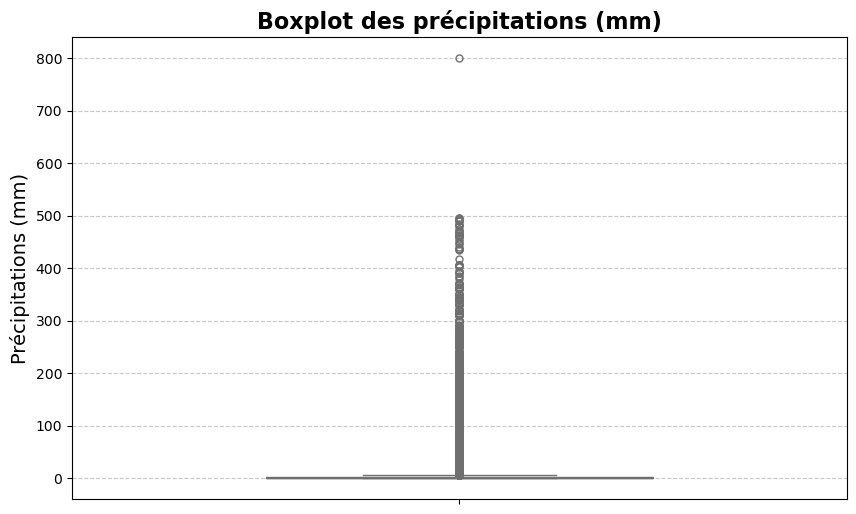

In [37]:
# Supprimer les valeurs manquantes pour la colonne 'precipitation_mm'
df_moustache = df_cedeao.dropna(subset=['precipitation_mm'])

# Configuration de la taille de la figure
plt.figure(figsize=(10, 6))

# Créer le boxplot
sns.boxplot(y='precipitation_mm', data=df_moustache, color='skyblue', fliersize=5, width=0.5)

# Ajouter un titre et des labels
plt.title('Boxplot des précipitations (mm)', fontsize=16, fontweight='bold')
plt.ylabel('Précipitations (mm)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter une grille

# Afficher le boxplot
plt.show()


Il y a une valeur atypique (800 mm)

In [40]:

# Filtrer le DataFrame pour trouver les lignes avec une précipitation de 80 mm
ligne_precipitation_800mm = df_cedeao[df_cedeao['precipitation_mm'] == 800]

# Afficher la ligne (ou les lignes) correspondante(s)
print(ligne_precipitation_800mm)


      id_station nom_ville   pays   etat iso2 iso3  latitude  longitude  \
17421      65344   Cotonou  Benin  Ouémé   BJ  BEN  6.400009   2.519991   

            date  saison  temp_moyenne_c  temp_min_c  temp_max_c  \
17421 1944-02-14  Winter       28.028613        22.7        33.3   

       precipitation_mm  vitesse_vent_moyenne_kmh  annee  
17421             800.0                       NaN   1944  


C'était en le 2 février 1944, et en plus en hivers. Nous allons la laisser telle quelle car nous ne comptons pas travailler avec cette donnée.

<h2 class = "styled-subtitle">Traitement des variables vitesse du vent et etat</h2>

<h3 class = "styled-sub-subtitle">Vitesse du vent</h3>

<p class = "styled-text">Expliquer pourquoi</p

In [53]:
pays_CEDEAO = pays_CEDEAO.drop(columns=['vitesse_vent_moyenne_kmh', 'annee'])


In [54]:
pays_CEDEAO = pays_CEDEAO.drop(columns=['etat'])

In [55]:
# Trouver la dernière date
derniere_date = df_cedeao['date'].max()

# Calculer la date d'il y a 10 ans
date_10_ans = pd.to_datetime(derniere_date) - pd.DateOffset(years=10)

# Filtrer les données pour la période de 10 ans
df_cedeao_10 = df_cedeao[
    (pd.to_datetime(df_cedeao['date']) >= date_10_ans) &
    (pd.to_datetime(df_cedeao['date']) <= pd.to_datetime(derniere_date))
]

print(df_cedeao_10.head())
print("Le nombre d'observations de la base des pays de la CEDEAO pour les dernières années est: ",len (df_cedeao_10))

      id_station nom_ville   pays etat iso2 iso3  latitude  longitude  \
12873      65338    Abomey  Benin  Zou   BJ  BEN    7.1904   1.989997   
12874      65338    Abomey  Benin  Zou   BJ  BEN    7.1904   1.989997   
12875      65338    Abomey  Benin  Zou   BJ  BEN    7.1904   1.989997   
12876      65338    Abomey  Benin  Zou   BJ  BEN    7.1904   1.989997   
12877      65338    Abomey  Benin  Zou   BJ  BEN    7.1904   1.989997   

            date  saison  temp_moyenne_c  temp_min_c  temp_max_c  \
12873 2013-09-05  Autumn            25.1   23.000000        30.3   
12874 2013-09-06  Autumn            24.7   22.600000        29.5   
12875 2013-09-07  Autumn            25.6   22.500000        31.4   
12876 2013-09-08  Autumn            24.8   22.500000        28.4   
12877 2013-09-09  Autumn            24.8   23.390805        31.5   

       precipitation_mm  vitesse_vent_moyenne_kmh  annee  
12873               NaN                       NaN   2013  
12874               NaN           

In [ ]:
# Calculer la date d'il y a 10 ans
date_30_ans = pd.to_datetime(derniere_date) - pd.DateOffset(years=30)

# Filtrer les données pour la période de 30 ans
df_cedeao_30 = df_cedeao[
    (pd.to_datetime(df_cedeao['date']) >= date_30_ans) &
    (pd.to_datetime(df_cedeao['date']) <= pd.to_datetime(derniere_date))
]

print(df_cedeao_30.head())
print("Le nombre d'observations de la base des pays de la CEDEAO pour les dernières années est: ",len (df_cedeao_10))

<h3 class = "styled-sub-subtitle">Exportation des bases de la CEDEAO sous format .csv</h3>

In [57]:
df_cedeao_10.to_csv('df_cedeao_10ans.csv', index=False)
df_cedeao_30.to_csv('df_cedeao_30ans.csv', index=False)

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h1 class = "styled-title">ANALYSE</h1>

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h1 class = "styled-title">PREVISION</h1>

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h1 class = "styled-title">CONCLUSION</h1>

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**

<h1 class = "styled-title">RESSOURCES</h1>

**[Revenir à la table des matières](#TABLES-DES-MATIERES)**